## NOTEBOOK 2

**TEAM MEMBERS :-** <br/>
**1. Lacey Hamilton**<br/>
**2. Megha Viswanath**<br/>
**3. Yena Hong**

### BINARY CLASSIFICATION

The original dataset comprises a total of 1,411,064 entries; however, we are using a smaller subset containing 300,000 entries in this analysis. By carefully selecting a proportional amount of samples from each malware type and benign category, we have maintained the original dataset's ratio, enabling efficient processing and analysis. This approach ensures that our models are trained and evaluated on a representative sample of the data without overwhelming system resources or encountering Out of Memory Errors.

In [2]:
import pandas as pd

df = pd.read_csv('Downloads/AndroidMalware.csv')

#removes all the unnecessary spaces in the column names
df.columns = df.columns.str.strip()

#remove null and duplicates
df = df.dropna()
df = df.drop_duplicates()

# convert selected columns to numeric data type
df[['Protocol', 'Fwd PSH Flags', 'FIN Flag Count', 'SYN Flag Count', 'PSH Flag Count',
    'ACK Flag Count', 'URG Flag Count', 'Down/Up Ratio']] \
= df[['Protocol', 'Fwd PSH Flags', 'FIN Flag Count', 'SYN Flag Count', 'PSH Flag Count',
      'ACK Flag Count', 'URG Flag Count', 'Down/Up Ratio']].apply(pd.to_numeric)

# convert numeric columns to integer data type
df[['Protocol', 'Fwd PSH Flags', 'FIN Flag Count', 'SYN Flag Count', 'PSH Flag Count',
    'ACK Flag Count', 'URG Flag Count', 'Down/Up Ratio']] \
= df[['Protocol', 'Fwd PSH Flags', 'FIN Flag Count', 'SYN Flag Count', 'PSH Flag Count', 
      'ACK Flag Count', 'URG Flag Count', 'Down/Up Ratio']].astype(int)

/var/folders/gk/60_z3j29419_m3j2f15t0c3h0000gn/T/ipykernel_40206/3016448773.py:3: DtypeWarning: Columns (56,58,63) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Downloads/AndroidMalware.csv')


In [3]:
#create binary variable
df['Target'] = df['Label'].apply(lambda x: 1 if x.startswith('Android_') else 0)

#value distribution
print(df.Target.value_counts())

#normalized
print(df.Target.value_counts(normalize=True))

1    329033
0     23708
Name: Target, dtype: int64
1    0.932789
0    0.067211
Name: Target, dtype: float64


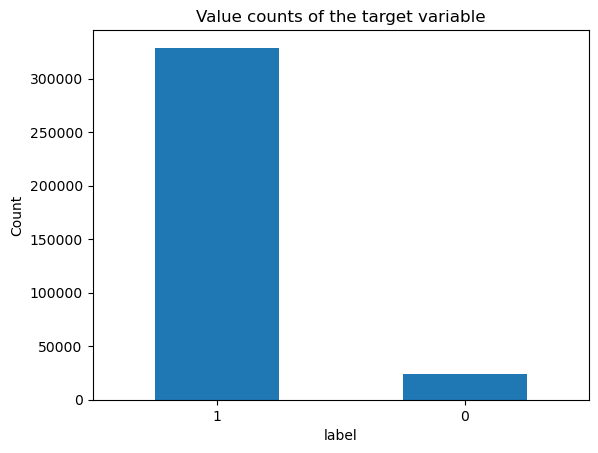

In [87]:
import matplotlib.pyplot as plt
df['Target'].value_counts().plot(kind="bar")
plt.title("Value counts of the target variable")
plt.xlabel("label")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

In [4]:
#data severely imbalanced so I will upsampled the benign variable
#try oversampling for imbalanced data
df5 = df
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df5[(df5['Target']==1)] 
df_minority = df5[(df5['Target']==0)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 329033, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

print(df_upsampled['Target'].value_counts())

print(df_upsampled.Target.value_counts(normalize=True))

0    329033
1    329033
Name: Target, dtype: int64
0    0.5
1    0.5
Name: Target, dtype: float64


In [5]:
#since IP address does not predict attack i will drop those columns.
# IP address would useful for identifying if an attack came internally or externally

df_upsampled = df_upsampled.drop(columns=['Unnamed: 0', 'Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol', 'Timestamp'])

In [6]:
# convert selected columns to numeric data type
df_upsampled[['Fwd PSH Flags', 'FIN Flag Count', 'SYN Flag Count', 'PSH Flag Count',
    'ACK Flag Count', 'URG Flag Count', 'Down/Up Ratio']] \
= df_upsampled[['Fwd PSH Flags', 'FIN Flag Count', 'SYN Flag Count', 'PSH Flag Count',
      'ACK Flag Count', 'URG Flag Count', 'Down/Up Ratio']].apply(pd.to_numeric)

# convert numeric columns to integer data type
df_upsampled[['Fwd PSH Flags', 'FIN Flag Count', 'SYN Flag Count', 'PSH Flag Count',
    'ACK Flag Count', 'URG Flag Count', 'Down/Up Ratio']] \
= df_upsampled[['Fwd PSH Flags', 'FIN Flag Count', 'SYN Flag Count', 'PSH Flag Count', 
      'ACK Flag Count', 'URG Flag Count', 'Down/Up Ratio']].astype(int)

In [7]:
df_upsampled

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Target
355576,61696,1,1,37.0,94.0,37.0,37.0,37.0,0.000000,94.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,0
347717,31767,1,1,48.0,90.0,48.0,48.0,48.0,0.000000,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,0
332782,5362655,2,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,0
337312,8820,1,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,0
353497,926617,1,1,32.0,217.0,32.0,32.0,32.0,0.000000,217.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331917,10085176,3,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_SMS_Malware,1
331918,10,2,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_SMS_Malware,1
331919,8,2,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_SMS_Malware,1
331920,1025711,3,3,768.0,317.0,768.0,0.0,256.0,443.405007,317.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_SMS_Malware,1


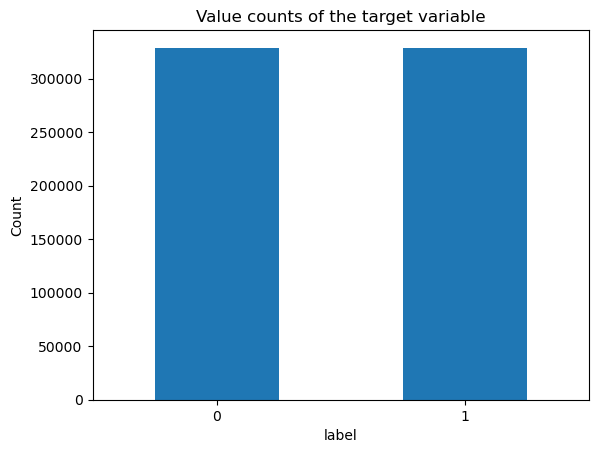

In [35]:
import matplotlib.pyplot as plt
df_upsampled['Target'].value_counts().plot(kind="bar")
plt.title("Value counts of the target variable")
plt.xlabel("label")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler
y = df_upsampled["Target"]
X = df_upsampled.iloc[:, 1:77]
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.3)


In [23]:
#Select from Naive Bayes
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from numpy import array
estimator = LogisticRegression()
selector = SelectFromModel(estimator, importance_getter='auto')
selector = selector.fit(X_train, y_train)

f1 = selector.get_support(1)
dflr = X[X.columns[f1]]

dflr

/Users/lacey/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Flow Bytes/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,...,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Packet Length Variance,min_seg_size_forward,Active Std,Active Max,Active Min,Idle Std,Idle Max
355576,2123.314315,6.169600e+04,0.000000e+00,61696.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,...,0.000000,0.0,0.0,1083.000000,32.0,0.0,0.0,0.0,0.0,0.0
347717,4344.130702,3.176700e+04,0.000000e+00,31767.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,...,0.000000,0.0,0.0,588.000000,32.0,0.0,0.0,0.0,0.0,0.0
332782,0.000000,5.362655e+06,0.000000e+00,5362655.0,5362655.0,5362655.0,0.000000e+00,5362655.0,5362655.0,0.0,...,0.000000,0.0,0.0,0.000000,32.0,0.0,0.0,0.0,0.0,0.0
337312,0.000000,8.820000e+03,0.000000e+00,8820.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,20.0,0.0,0.0,0.0,0.0,0.0
353497,268.719439,9.266170e+05,0.000000e+00,926617.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,...,0.000000,0.0,0.0,11408.333333,20.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331917,0.000000,3.361725e+06,5.800886e+06,10060000.0,10085176.0,5042588.0,7.095692e+06,10060000.0,25176.0,0.0,...,0.000000,0.0,0.0,0.000000,32.0,0.0,0.0,0.0,0.0,0.0
331918,0.000000,1.000000e+01,0.000000e+00,10.0,10.0,10.0,0.000000e+00,10.0,10.0,0.0,...,0.000000,0.0,0.0,0.000000,32.0,0.0,0.0,0.0,0.0,0.0
331919,0.000000,8.000000e+00,0.000000e+00,8.0,8.0,8.0,0.000000e+00,8.0,8.0,0.0,...,0.000000,0.0,0.0,0.000000,32.0,0.0,0.0,0.0,0.0,0.0
331920,1057.802831,2.051422e+05,2.116620e+05,508002.0,766162.0,383081.0,1.766650e+05,508002.0,258160.0,769294.0,...,539659.652761,766244.0,3050.0,87023.000000,20.0,0.0,0.0,0.0,0.0,0.0


In [24]:
dflr['Target'] = df['Target']

/var/folders/gk/60_z3j29419_m3j2f15t0c3h0000gn/T/ipykernel_40206/3026348837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dflr['Target'] = df['Target']


In [25]:
dflr.columns

Index(['Flow Bytes/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Packet Length Variance',
       'min_seg_size_forward', 'Active Std', 'Active Max', 'Active Min',
       'Idle Std', 'Idle Max', 'Target'],
      dtype='object')

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
y = dflr["Target"]
X = dflr.iloc[:, 1:21]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

In [82]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
score = accuracy_score(y_test, y_pred)

score = nb.score(X_test, y_test)

score

0.5

In [85]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.99      0.66     98710
           1       0.50      0.01      0.03     98710

    accuracy                           0.50    197420
   macro avg       0.50      0.50      0.35    197420
weighted avg       0.50      0.50      0.35    197420



In [27]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

y = dflr["Target"]
X = dflr.iloc[:, 1:21]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify = y, test_size=0.3, random_state=125)
decision_tree = tree.DecisionTreeClassifier()
decision_tree = decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)
score = accuracy_score(y_test, y_pred)

score = decision_tree.score(X_test, y_test)

score

0.9466163509269577

In [28]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)

score = model.score(X_test, y_test)

score

0.6836693344139398

In [ ]:
from sklearn import svm

clf = svm.SVC(kernel='linear') # Linear Kernel


clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)


score

In [31]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)
neigh.get_params()
y_pred = neigh.predict(X_test)
score = accuracy_score(y_test, y_pred)


score

0.8803768615135245

In [36]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
mlp.fit(X_train, y_train)


y_pred = mlp.predict(X_test)
score = accuracy_score(y_test, y_pred)


score

0.5168017424779657

## CONCLUSION:

**The Decision Tree Classifier performed the best with an accuracy of 94.66% for classiying between the Malignant Malware and Benign Malwares**